In [1]:
import pandas as pd


def parse_file_to_df(file_path):
    data = {'epoch': [], 'loss': [], 'val_loss': []}

    with open(file_path, 'r') as file:
        lines = file.readlines()

        for line in lines:
            parts = line.strip().split('|')

            for part in parts:
                label, value = part.split(':')
                data[label].append(float(value))

    return pd.DataFrame(data).round(4)


# Use the function
dfs = parse_file_to_df('tune_s.log')
dfsaug = parse_file_to_df('tune_s_aug.log')
dfm = parse_file_to_df('tune_m.log')
dfmaug = parse_file_to_df('tune_m_aug.log')

print(dfs.head())
print(dfsaug.head())
print(dfm.head())
print(dfmaug.head())


   epoch    loss  val_loss
0    1.0  0.1028    0.0746
1    2.0  0.0609    0.0504
2    3.0  0.0368    0.0373
3    4.0  0.0230    0.0320
4    5.0  0.0149    0.0307
   epoch    loss  val_loss
0    1.0  0.1043    0.0800
1    2.0  0.0629    0.0514
2    3.0  0.0376    0.0392
3    4.0  0.0229    0.0344
4    5.0  0.0147    0.0348
   epoch    loss  val_loss
0    1.0  0.0386    0.0271
1    2.0  0.0263    0.0240
2    3.0  0.0211    0.0217
3    4.0  0.0167    0.0223
4    5.0  0.0131    0.0221
   epoch    loss  val_loss
0    1.0  0.0386    0.0292
1    2.0  0.0255    0.0260
2    3.0  0.0205    0.0233
3    4.0  0.0162    0.0230
4    5.0  0.0128    0.0228


/var/folders/c4/syfmh0gs1jbb5q_69pf2hs4c0000gn/T/ipykernel_22410/66531914.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce')


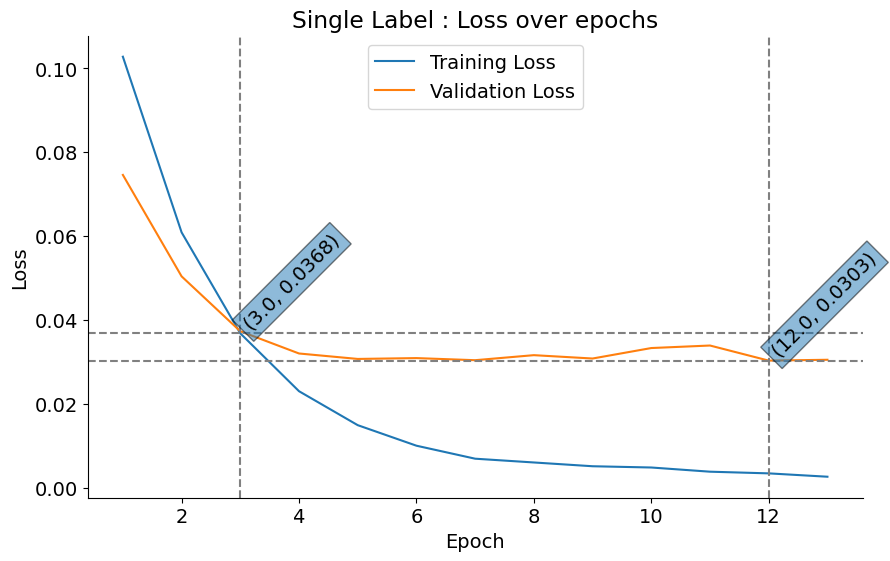

/var/folders/c4/syfmh0gs1jbb5q_69pf2hs4c0000gn/T/ipykernel_22410/66531914.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce')


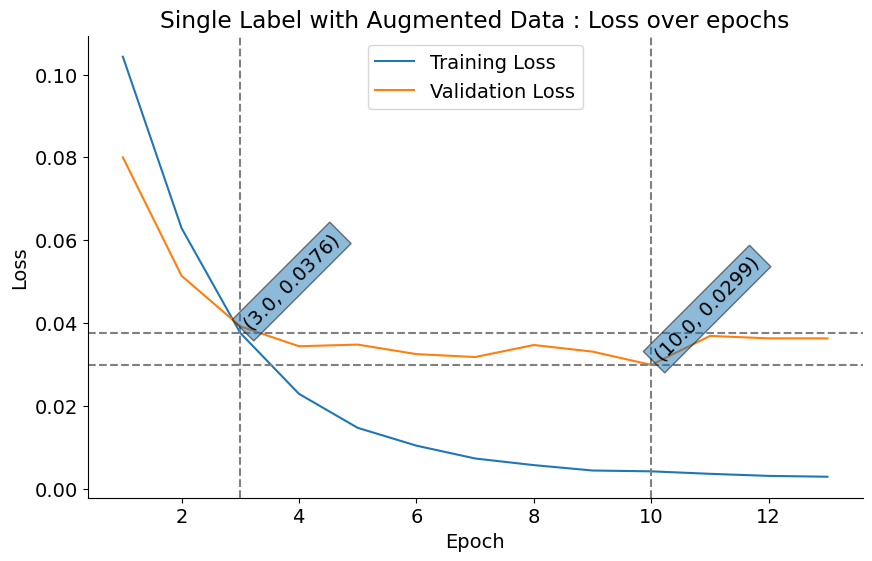

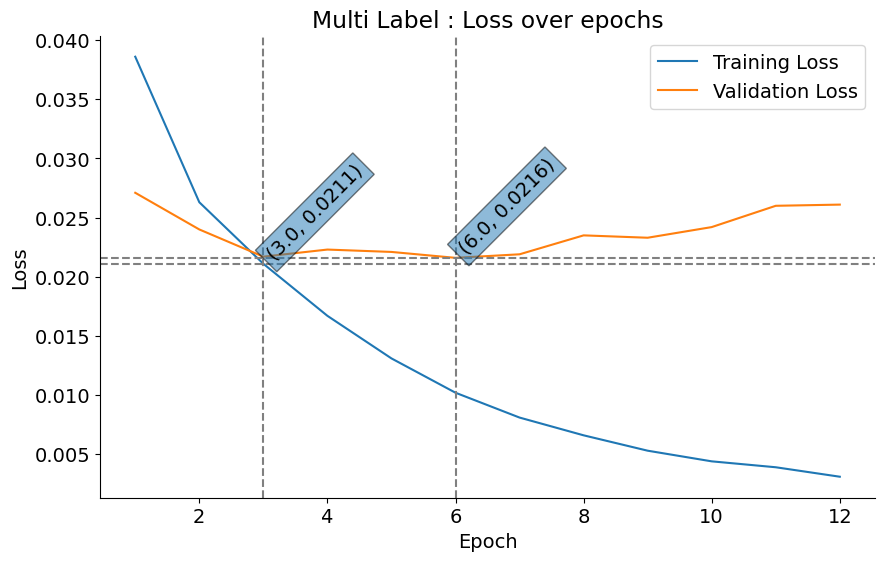

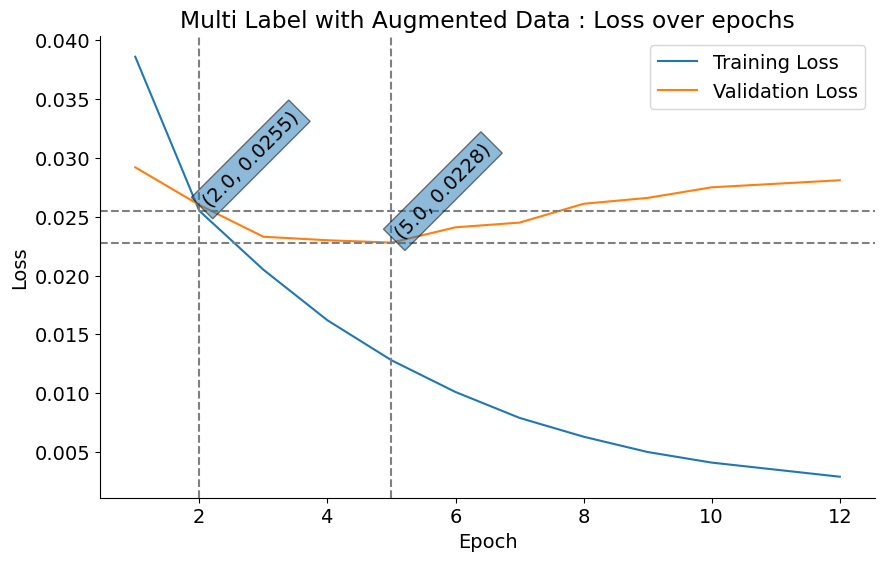

In [2]:
import numpy as np
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt


def make_loss_plots(df, _type='', _ha='left', _va='bottom'):
    # Convert the columns to numeric type
    for col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    matplotlib.rc('font', **{'size': 14})

    # Plot the 'loss' column
    plt.figure(figsize=(10, 6))
    plt.plot(df['epoch'], df['loss'], label='Training Loss')
    plt.plot(df['epoch'], df['val_loss'], label='Validation Loss')

    # Find the minimum loss and its corresponding epoch
    min_loss = df['val_loss'].min()
    min_loss_epoch = df['epoch'][df['val_loss'].idxmin()]

    # Add a vertical line at the epoch of minimum loss
    plt.axvline(x=min_loss_epoch, color='gray', linestyle='--')

    # Add a horizontal line at the minimum loss
    plt.axhline(y=min_loss, color='gray', linestyle='--')

    # Print the values at the lines inside the plot
    plt.text(min_loss_epoch, min_loss, f'({min_loss_epoch}, {min_loss})', ha=_ha, va=_va,
             bbox=dict(alpha=0.5), rotation=45)

    # Find the intersection point of the 'Training Loss' and 'Validation Loss'
    diff = df['loss'] - df['val_loss']
    intersection_index = np.where(np.diff(np.sign(diff)))[0][0] + 1
    intersection_epoch = df['epoch'][intersection_index]
    intersection_loss = df['loss'][intersection_index]

    # Add a vertical line at the epoch of intersection
    plt.axvline(x=intersection_epoch, color='gray', linestyle='--')

    # Add a horizontal line at the intersection loss
    plt.axhline(y=intersection_loss, color='gray', linestyle='--')

    # Print the values at the lines inside the plot
    plt.text(intersection_epoch, intersection_loss, f'({intersection_epoch}, {intersection_loss})', ha=_ha, va=_va,
             bbox=dict(alpha=0.5), rotation=45)

    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    title = f'{_type} Loss over epochs'
    plt.title(title)
    
    ax = plt.gca()
    # Hide the top and right spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    # Only show ticks on the left and bottom spines
    ax.yaxis.tick_left()
    ax.xaxis.tick_bottom()

    plt.savefig(f'{title}-{datetime.now().time()}.pdf', format='pdf')

    plt.show()


make_loss_plots(dfs.head(13), _type='Single Label :')
make_loss_plots(dfsaug.head(13), _type='Single Label with Augmented Data :')
make_loss_plots(dfm.head(13), _type='Multi Label :')
make_loss_plots(dfmaug.head(13), _type='Multi Label with Augmented Data :')